# Lead Scoring Case Study

#### Goals of Case Study 
- To build a logistic regression model that can be used to assign a lead score between 0 and 100 to each lead.
- The lead score will be used by the company to target potential leads.
- A higher score will mean that the lead is hot, i.e. is most likely to convert.
- A lower score will mean that the lead is cold and will mostly not get converted.

In [109]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [88]:
# Load the data
data = pd.read_csv("Leads.csv")

In [89]:
# Check the data 
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [45]:
# Check the shape of the data 
data.shape 

(9240, 37)

In [5]:
# Check the data 
data.describe() 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Check for duplicates

In [22]:
duplicate_rows = data.duplicated()
print("Duplicate Rows:")
print(data[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]


##### There are no duplicates in rows


##### Check for null values 

In [90]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Artic

##### Calculate the percentage of null values

In [91]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()

# Calculate the percentage of null values
total_rows = len(data)
null_percentage = round((null_values / total_rows) * 100,2)

print("Null Value Percentage:")
print(null_percentage)

Null Value Percentage:
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                  

#### Droping coulmns greater than 50 percentage 

In [92]:
columns_to_drop = null_percentage[null_percentage > 50].index
data = data.drop(columns=columns_to_drop)

In [31]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [93]:
# Drop the irrelevant columns
data = data.drop(["Lead Number", "Prospect ID"], axis=1)

 Using median to fill missing values in non categorical columns 

In [94]:
columns_to_fill = ["TotalVisits", "Page Views Per Visit"]
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].median())


### Categorical Attributes Analysis

In [13]:
data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

### Droping non categorical coulmns with missing values greater than 45% 

In [95]:
## droping the folowing coulmns because they have missing values greater than 45% and is not categorical 
data = data.drop(columns=["Asymmetrique Activity Score","Asymmetrique Profile Score"])

In [96]:
# Replace the missing values with the most frequent value for the missing values in categorical column 
data = data.fillna(data.mode().iloc[0])

### Univariate analysis of Country Coulmn 

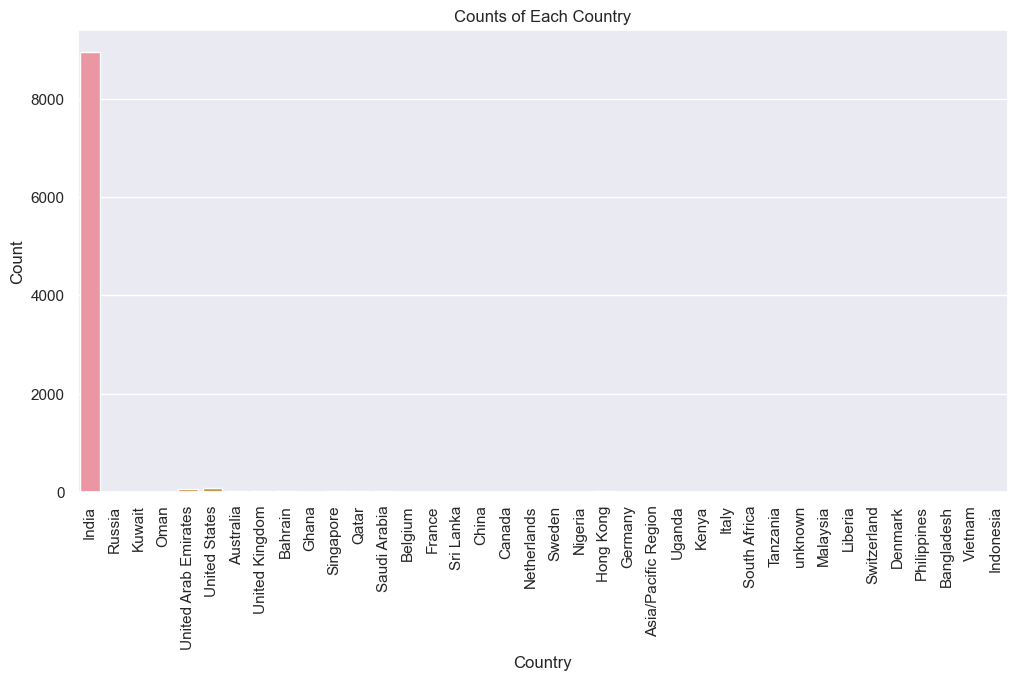

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="Country", data=data)
plt.title("Counts of Each Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

 We can infer from the above graph that most of the students enrolled are from India 

### Univariate Analysis of City

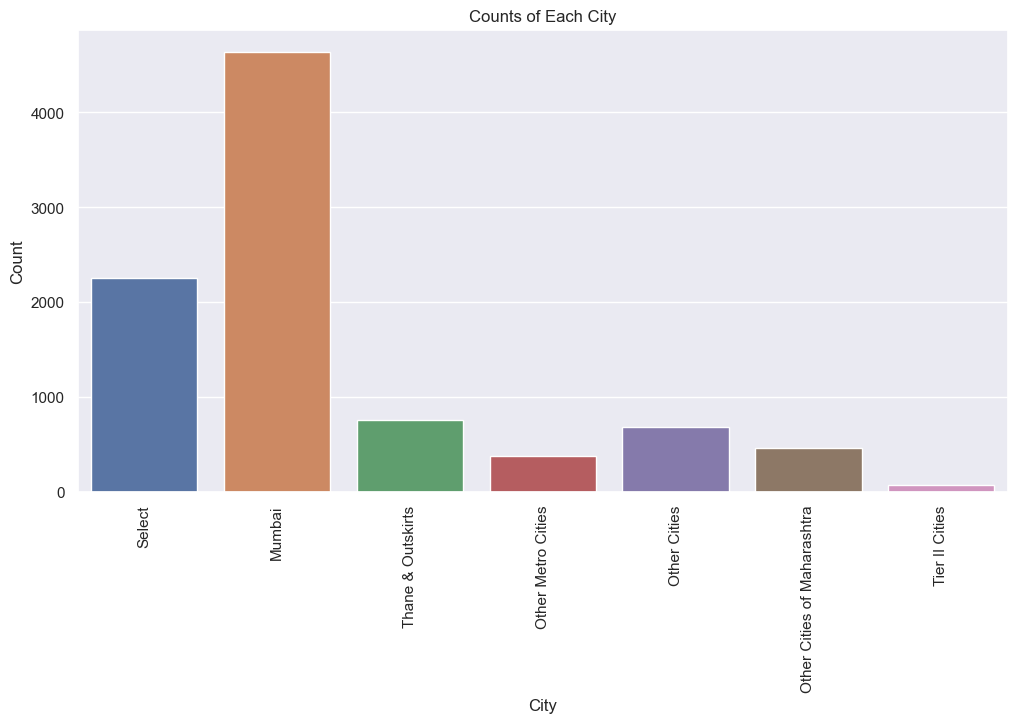

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="City", data=data)
plt.title("Counts of Each City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

We can infer from the above graph that most of the students are from Mumbai

### Univariate Analysis of Specialization And Conversion

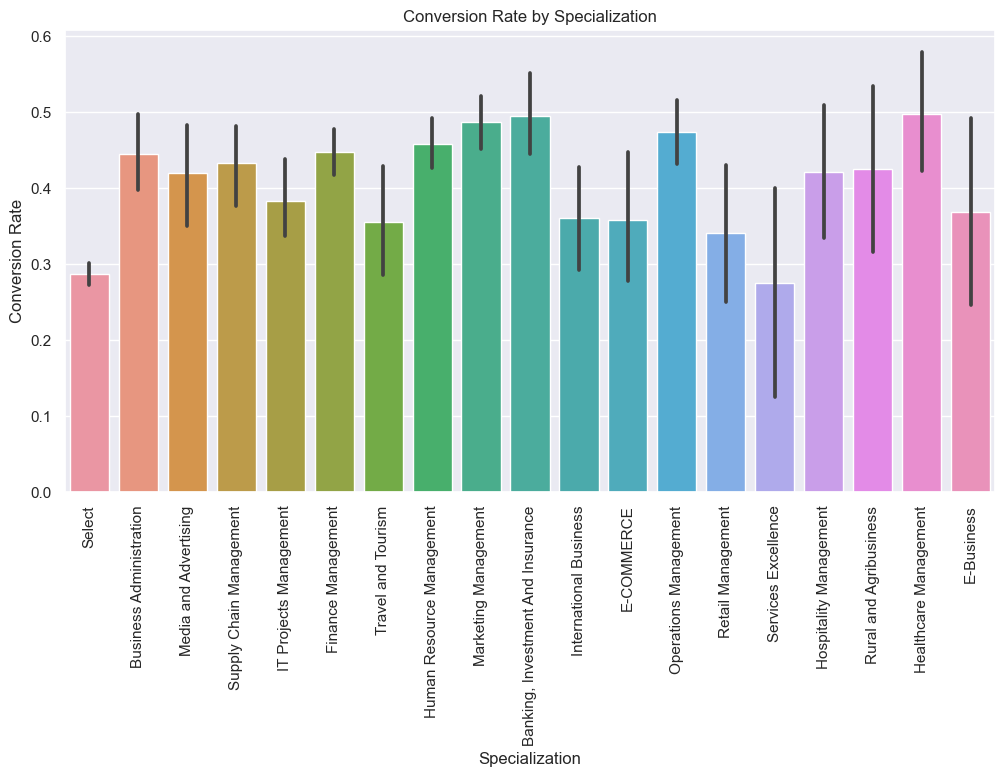

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Specialization", y="Converted", data=data)
plt.title("Conversion Rate by Specialization")
plt.xlabel("Specialization")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from the above bivariate analysis that conversion is high in the management related courses 

### Univariate Analysis of Occupation vs Conversion

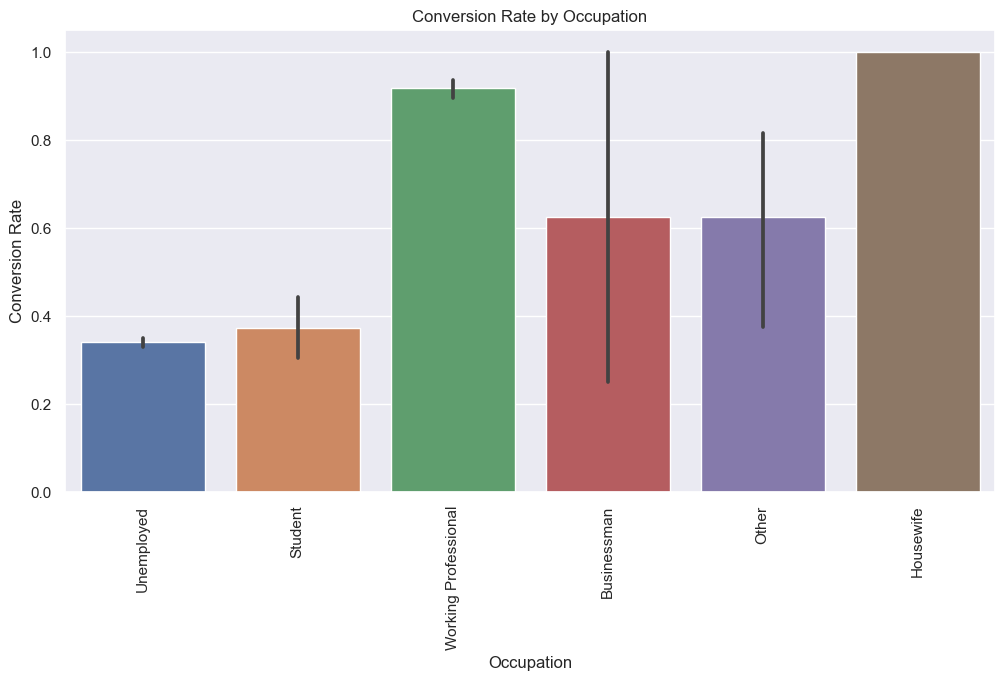

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x="What is your current occupation", y="Converted", data=data)
plt.title("Conversion Rate by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from the graph that
- Conversion rate for working professional is high
- Conversion rate for Housewife is high

### Bivariate Analysis of Lead Source and Conversion

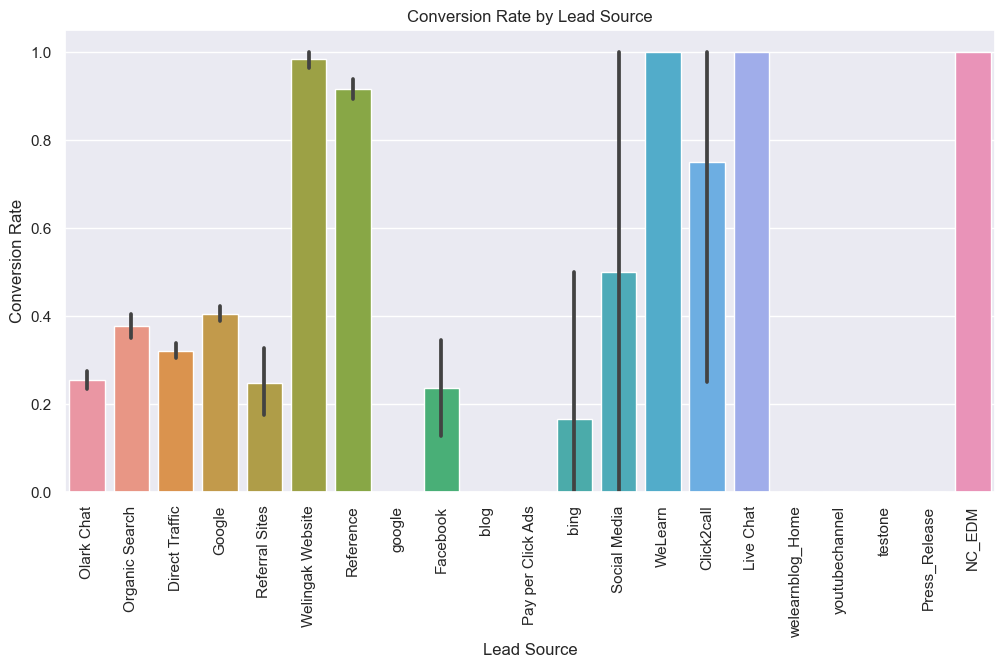

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Lead Source", y="Converted", data=data)
plt.title("Conversion Rate by Lead Source")
plt.xlabel("Lead Source")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from theabove graph the folowing are good sources for getting students
Welingak Website,Reference,Welearn,Click2call,LiveChat

#### Bivariate Analysis of Enrollment Motivation Vs Conversion

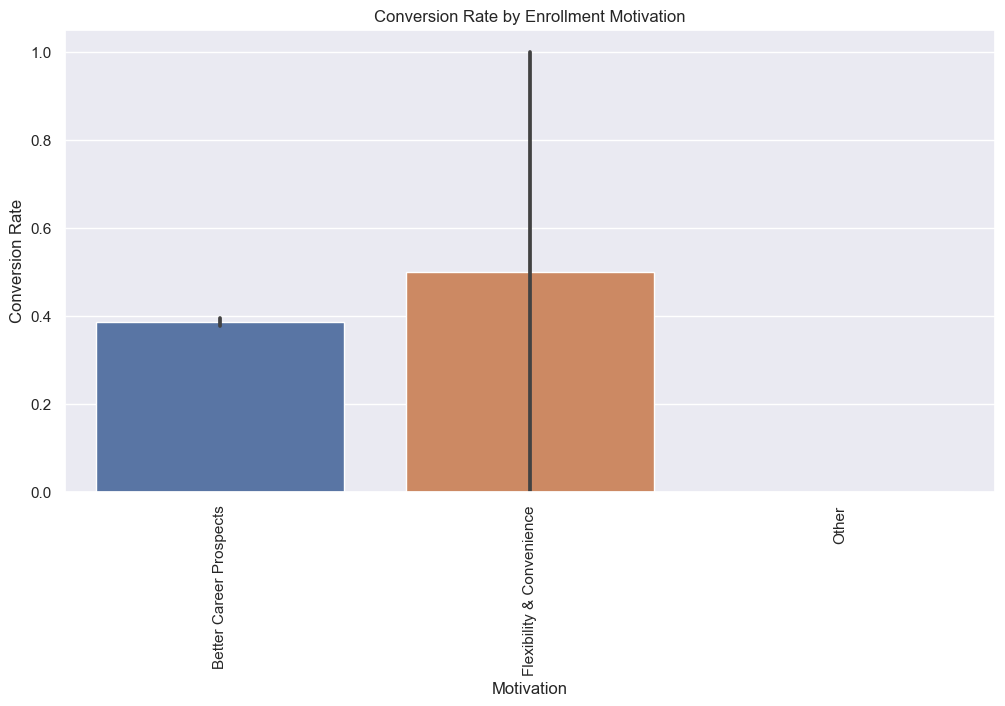

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(x="What matters most to you in choosing a course", y="Converted", data=data)
plt.title("Conversion Rate by Enrollment Motivation")
plt.xlabel("Motivation")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer people who likes to study online and want better career opportunities are having high chance for enrollment

### Bivariate Analysis of Lead Origin Vs Conversion 

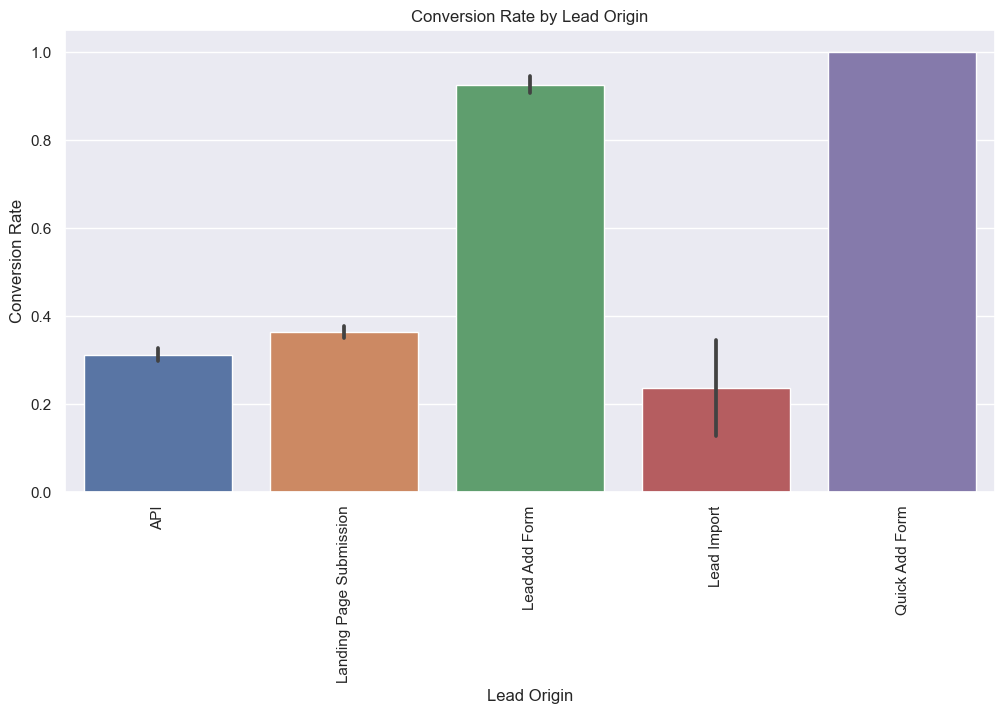

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Lead Origin", y="Converted", data=data)
plt.title("Conversion Rate by Lead Origin")
plt.xlabel("Lead Origin")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from graph the highest lead origin conversions are from forms which are lead add form and quick add form

### Non Categorical Coulnms 

### Univariate Analysis of Total Time spend on Website

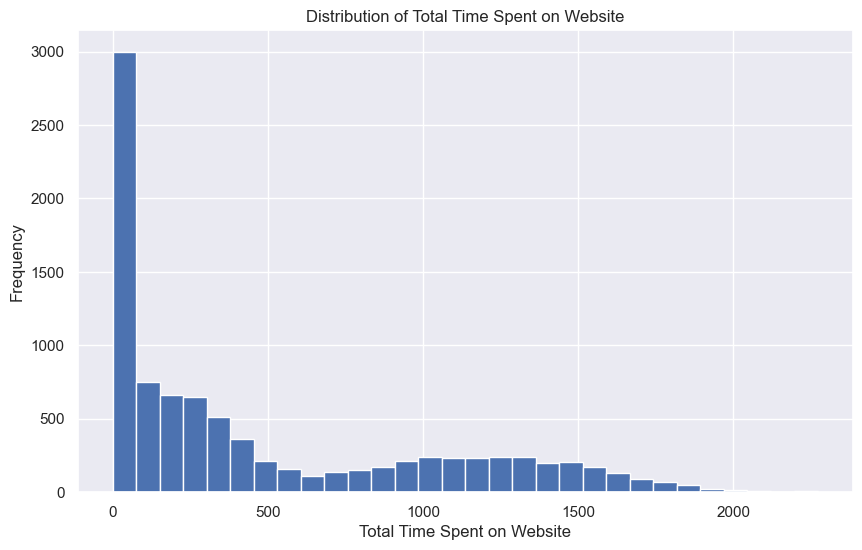

In [95]:
plt.figure(figsize=(10, 6))
plt.hist(data["Total Time Spent on Website"], bins=30)
plt.title("Distribution of Total Time Spent on Website")
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Frequency")
plt.show()

### Univariate analysis Page Views per visit

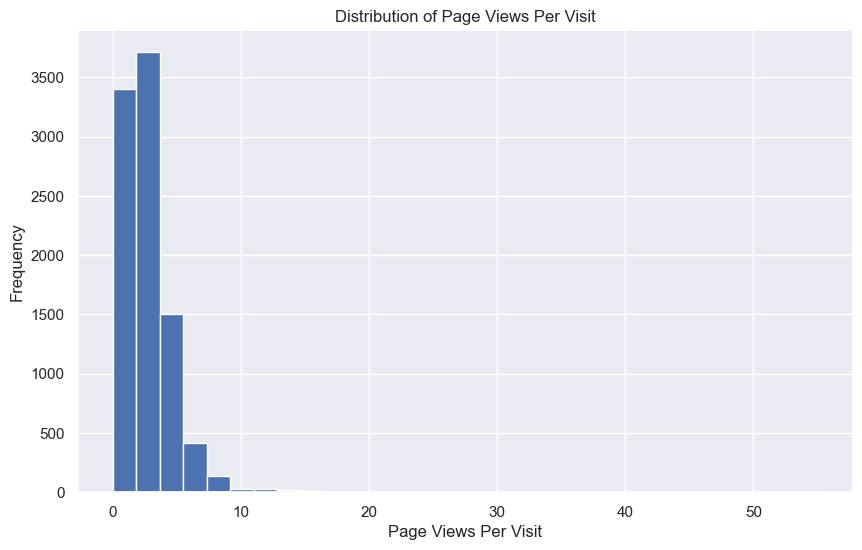

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(data["Page Views Per Visit"], bins=30)
plt.title("Distribution of Page Views Per Visit")
plt.xlabel("Page Views Per Visit")
plt.ylabel("Frequency")
plt.show()

### Univariate analysis Total Visits

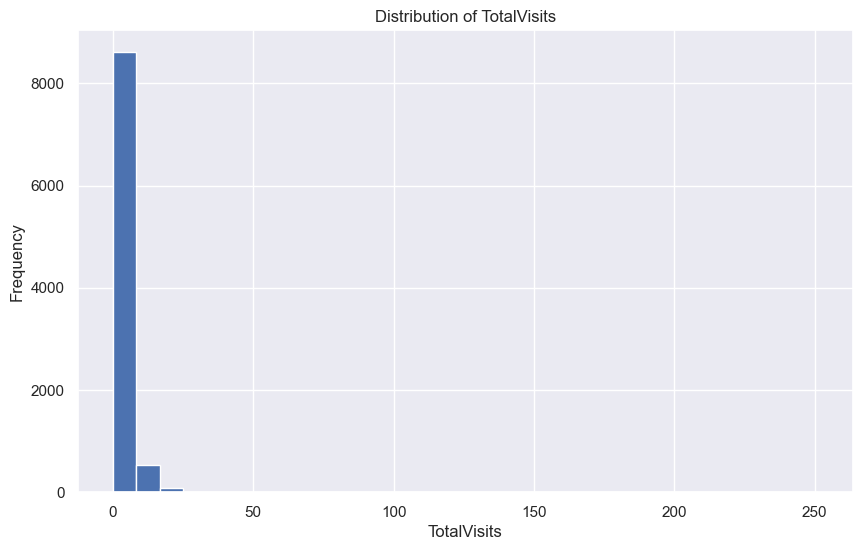

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(data["TotalVisits"], bins=30)
plt.title("Distribution of TotalVisits")
plt.xlabel("TotalVisits")
plt.ylabel("Frequency")
plt.show()

### Check correlation between Numerical variables

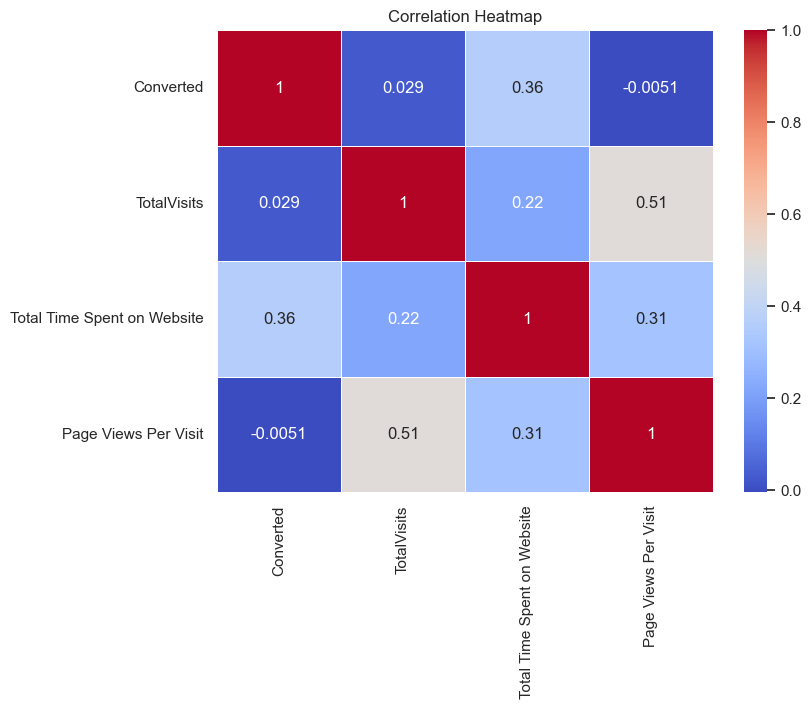

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

There is only a slight correlation between Total Visits and Page Views per visits but its not too strong correlation 

In [52]:
data.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

#### Select the categorical columns

In [97]:
categorical_cols = data.select_dtypes(include=['object']).columns

#### Convert categorical variables into dummy variables

In [98]:

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

#### Split the dataset into features (X) and target variable (y)

In [99]:
X = data.drop('Converted', axis=1)
y = data['Converted']

#### Split the data into training and testing sets

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Perform feature scaling

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Build and train the logistic regression model

In [102]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [106]:
rfe = RFE(model, n_features_to_select=15)  # Specifying  the number of features to select as 15
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)

In [107]:
# Print the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Specialization_Select',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_wrong number given',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')


In [111]:
# Select columns selected by RFE
X_train_sm = X_train[selected_features]

In [112]:
# Add constant to the feature matrix
X_train_sm = sm.add_constant(X_train_sm)

In [113]:
# Fit the logistic regression model using statsmodels
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

In [114]:
# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Specialization_Select',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_wrong number given',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Asymmetrique Activity Index_03.Low',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')


In [115]:
# Print the model summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1432.8
Date:                Thu, 18 May 2023   Deviance:                       2865.7
Time:                        11:37:47   Pearson chi2:                 1.83e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5889
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
vif = pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

# Print the VIF dataframe
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
                                             Features       VIF
0                                               const  9.754443
1                         Total Time Spent on Website  1.141776
2                        Lead Source_Welingak Website  1.054534
3                               Specialization_Select  1.818962
4   What is your current occupation_Working Profes...  1.217821
5                                           Tags_Busy  1.058554
6                             Tags_Closed by Horizzon  1.180354
7                                   Tags_Lost to EINS  1.066532
8            Tags_Will revert after reading the email  1.410583
9                             Tags_wrong number given  1.014506
10                                Lead Profile_Select  1.292905
11                 Lead Profile_Student of SomeSchool  1.174523
12                                        City_Select  1.599691
13                 Asymmetrique Activity Index_03.Low  1.025137
14     

In [119]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.067249
7132    0.936800
8954    0.262371
5283    0.002470
3003    0.440639
478     0.032579
1352    0.910901
3166    0.949513
7700    0.001233
2647    0.000312
dtype: float64

In [120]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.72490586e-02, 9.36800282e-01, 2.62370673e-01, 2.46956508e-03,
       4.40639311e-01, 3.25785365e-02, 9.10900876e-01, 9.49513497e-01,
       1.23337958e-03, 3.12214768e-04])

In [121]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.067249
1,1,0.936800
2,0,0.262371
3,0,0.002470
4,0,0.440639


In [122]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.067249,0
1,1,0.936800,1
2,0,0.262371,0
3,0,0.002470,0
4,0,0.440639,0


In [124]:
# Creating confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3771,  213],
       [ 332, 2152]], dtype=int64)

In [125]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.91573902288188

In [126]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [127]:
# Calculating the sensitivity
TP/(TP+FN)

0.8663446054750402

In [128]:
# Calculating the specificity
TN/(TN+FP)

0.9465361445783133

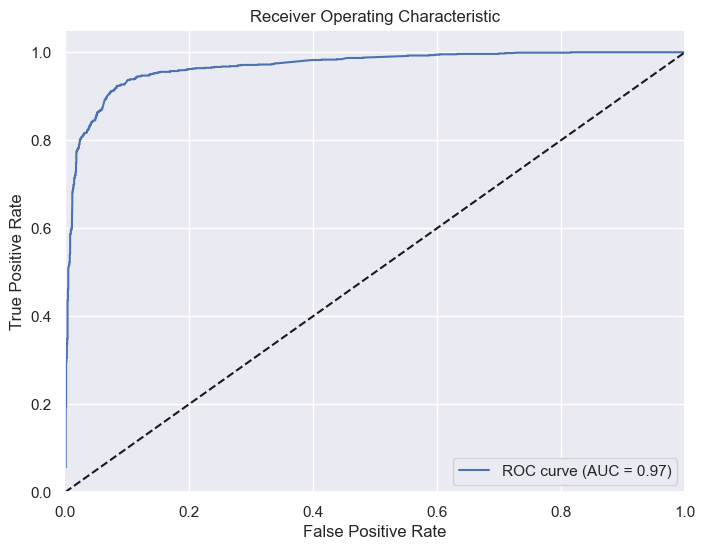

AUC: 0.967390024184956


In [131]:
from sklearn.metrics import roc_curve, auc

# Fit the logistic regression model on the test set
X_test_sm = sm.add_constant(X_test[selected_features])
y_pred_prob = res.predict(X_test_sm)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print("AUC:", roc_auc)


In [136]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Set the probability cutoffs
cutoffs = [0.2, 0.4, 0.6, 0.8]

# Initialize lists to store the evaluation metrics
accuracy = []
sensitivity = []
specificity = []

# Loop through each cutoff
for cutoff in cutoffs:
    # Apply the cutoff to classify the predictions
    predicted = [1 if prob >= cutoff else 0 for prob in y_pred_prob]
    
    # Calculate the evaluation metrics
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    
    # Append the metrics to the lists
    accuracy.append(acc)
    sensitivity.append(sens)
    specificity.append(spec)

# Create the evaluation metrics dataframe
metrics_df = pd.DataFrame({
    'Cutoff': cutoffs,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': specificity
})

# Print the dataframe
print(metrics_df)


   Cutoff  Accuracy  Sensitivity  Specificity
0     0.2  0.891053     0.953575     0.851327
1     0.4  0.919553     0.911792     0.924484
2     0.6  0.910895     0.836583     0.958112
3     0.8  0.889610     0.743733     0.982301


#### Evaluate the model

In [139]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)


Training Accuracy: 0.928726035868893
Testing Accuracy: 0.9246031746031746
